In [1]:
import base64
import io

import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy.physics.units import centimeter
from sympy.physics.units import convert_to
from sympy.physics.units import second
from sympy.physics.units import electronvolt
from sympy.physics.units import kelvin
from sympy.physics.units import watt
from sympy.physics.units import nanometer
from sympy.physics.units import meter

import lss

# Black Body (Planck) (Analytics)

In [2]:
c = sy.Symbol('c')
E_e = sy.Symbol('E_e')
E_e_lambda = sy.Symbol('E_{e, \\lambda}')
h = sy.Symbol('h')
J = sy.Symbol('J')
k_B = sy.Symbol('k_B')
slambda = sy.Symbol('\\lambda')
R_lambda = sy.Symbol('R_\\lambda')
sigma = sy.Symbol('\\sigma')
T = sy.Symbol('T')

constants = {
    c: 2.99792458e10 * centimeter * second**(-1),
    E_e: 1367.0 * watt * meter**(-2), # Sun
    h: 4.135667696e-15 * electronvolt * second,
    k_B: 8.617333262e-5 * electronvolt * kelvin**(-1),
}

In [3]:
R_lambda_ = (
    + 2 * sy.pi * h * c**2
    / slambda**5
    / (sy.exp(h * c / (slambda * k_B * T)) - 1)
)
sy.Eq(R_lambda, R_lambda_)

Eq(R_\lambda, 2*pi*c**2*h/(\lambda**5*(exp(c*h/(T*\lambda*k_B)) - 1)))

In [4]:
E_e_lambda_ = E_e * R_lambda / J

E_e_lambda__ = lambda T_, slambda_, J_: (
    convert_to(
        E_e_lambda_
            .subs(E_e_lambda, E_e_lambda_)
            .subs(R_lambda, R_lambda_)
            .subs(J, J_)
            .subs(constants)
            .subs(T, T_)
            .subs(slambda, slambda_ * nanometer)
            .simplify()
            .n(),
        watt * meter**(-2) * nanometer**(-1)
    ).coeff(watt * meter**(-2) * nanometer**(-1))
) * watt * meter**(-2) * nanometer**(-1)

sy.Eq(E_e_lambda, E_e_lambda_)

Eq(E_{e, \lambda}, E_e*R_\lambda/J)

In [5]:
T_ = 5778 * kelvin
sy.Eq(T, T_)

Eq(T, 5778*kelvin)

In [6]:
sigma_ = 2 * sy.pi**5 * k_B**4 / (15 * c**2 * h**3)
sy.Eq(sigma, sigma_)

Eq(\sigma, 2*pi**5*k_B**4/(15*c**2*h**3))

In [7]:
J_ = sigma * T**4
sy.Eq(J, J_)

Eq(J, T**4*\sigma)

In [8]:
J__ = convert_to(J_.subs(sigma, sigma_).subs(constants).subs(T, T_).n(), watt * meter**(-2))
sy.Eq(J, J__)

Eq(J, 63200699.7749412*watt/meter**2)

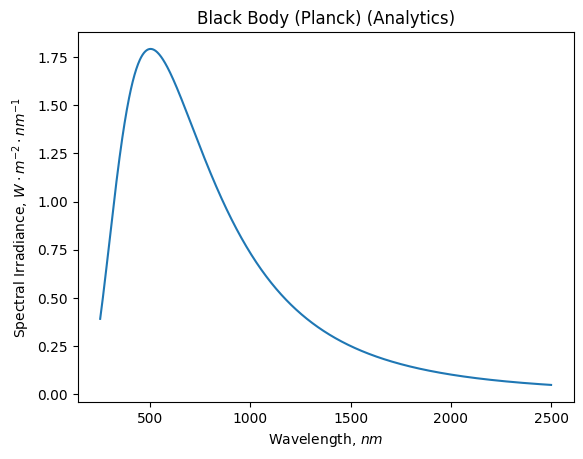

In [9]:
class BlackBodyAnalytics:
    wavelengths = np.linspace(250, 2500, int(1e3))
    spectral_flux_densities = (
        np.array([
            E_e_lambda__(T_, l, J__).coeff(watt * meter**(-2) * nanometer**(-1))
            for l in wavelengths
        ])
    )

plt.plot(BlackBodyAnalytics.wavelengths, BlackBodyAnalytics.spectral_flux_densities)
plt.title('Black Body (Planck) (Analytics)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Spectral Irradiance, $W \cdot m^{{-2}} \cdot nm^{{-1}}$')
plt.show()

# Black Body (Planck) (Numeric)

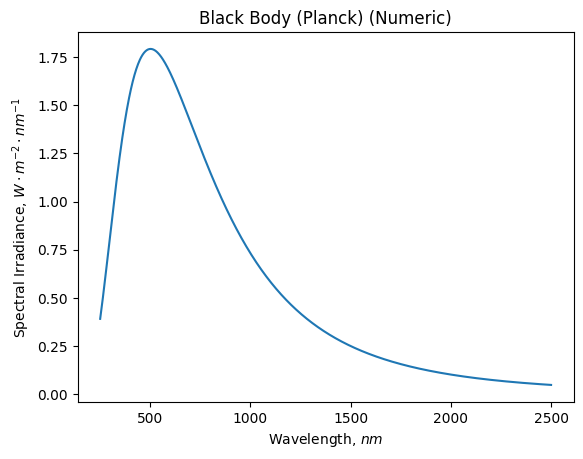

In [10]:
black_body = lss.BlackBodyPlanck()
black_body.temperature = 5778.0
black_body.total_area = 1367.0

class BlackBodyNumeric:
    # wavelengths = np.linspace(black_body.min_wavelength, 2500, int(1e3))
    wavelengths = np.linspace(250, 2500, int(1e3))
    spectral_flux_densities = np.array([black_body(l) for l in wavelengths])

plt.plot(BlackBodyNumeric.wavelengths, BlackBodyNumeric.spectral_flux_densities)
plt.title('Black Body (Planck) (Numeric)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Spectral Irradiance, $W \cdot m^{{-2}} \cdot nm^{{-1}}$')
plt.show()

# Sun (Gueymard)

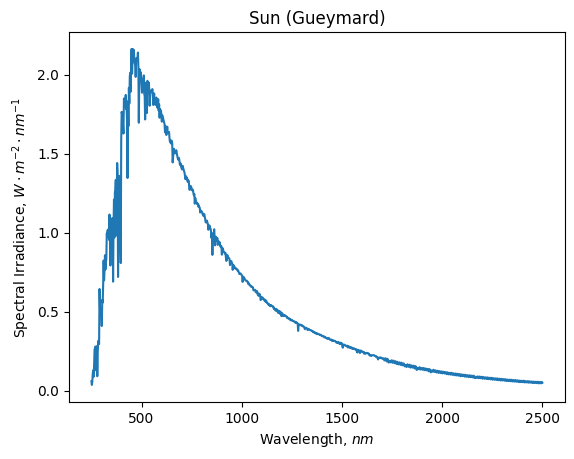

In [11]:
sun_gueymard = lss.SunGueymard()

class SunGueymard:
    # wavelengths = np.linspace(sun_gueymard.min_wavelength, sun_gueymard.max_wavelength, int(1e3))
    wavelengths = np.linspace(250, 2500, int(1e3))
    spectral_flux_densities = np.array([sun_gueymard(l) for l in wavelengths])

plt.plot(SunGueymard.wavelengths, SunGueymard.spectral_flux_densities)
plt.title('Sun (Gueymard)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Spectral Irradiance, $W \cdot m^{{-2}} \cdot nm^{{-1}}$')
plt.show()

del sun_gueymard

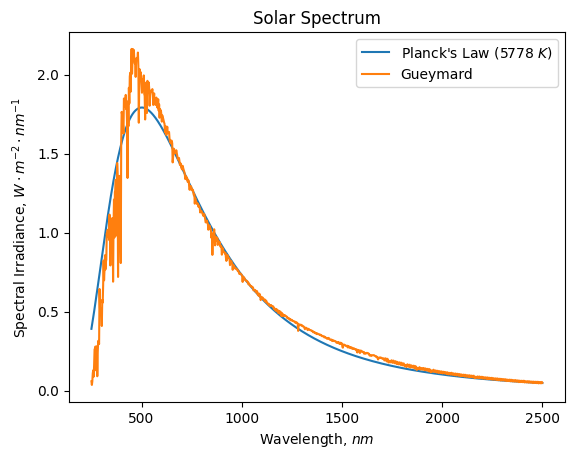

In [12]:
plt.plot(SunGueymard.wavelengths, BlackBodyAnalytics.spectral_flux_densities, label="Planck's Law ($5778$ $K$)")
plt.plot(SunGueymard.wavelengths, SunGueymard.spectral_flux_densities, label="Gueymard")
plt.title('Solar Spectrum')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Spectral Irradiance, $W \cdot m^{{-2}} \cdot nm^{{-1}}$')
plt.legend()
plt.show()

# tmp = io.BytesIO()
# plt.savefig(tmp, format='svg')
# tmp.seek(0)
# encoded = base64.b64encode(tmp.read())

# Kelt 9 (Fossati)

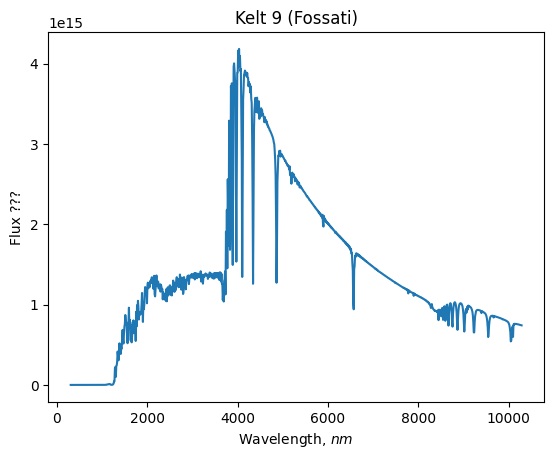

In [13]:
kelt_9_fossati = lss.Kelt9Fossati()

wavelengths = np.linspace(kelt_9_fossati.min_wavelength, kelt_9_fossati.max_wavelength, int(1e3))
spectral_flux_densities = np.array([kelt_9_fossati(l) for l in wavelengths])

plt.plot(wavelengths, spectral_flux_densities)
plt.title('Kelt 9 (Fossati)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Flux ???')
plt.show()

del kelt_9_fossati